# Lecture 9

October 7, 2024

## Functions revisited

I thought I would take some time to explain some of the more general features built into functions in Python. In particular, I want to briefly discuss how functions can have an arbitrary number of arguments. A reference is Chapter 7 of the book &ldquo;Learn Python in 7 Days : Learn Efficient Python Coding Within 7 Days.&rdquo;

### Arguments (even arbitrarily many)

Recall that functions can have *arguments*. For example, the following function has two arguments: $x$ and $y$.

In [1]:
def f(x, y):
    return 3*x+y

In [2]:
f(3, 2)

11

If you want to allow any number of arguments, you can use the following syntax:
```python
def print_arguments(*args):
    print(args)
```
Here `*args` indicates that there can be any number of arguments here. Let's try it.

In [3]:
def print_arguments(*args):
    print(args)

In [4]:
print_arguments(3,2,5, sqrt(5))

(3, 2, 5, sqrt(5))


Observe that the object printed is a `tuple`. So, when `Sage` or `Python` sees `*args`, it organizes the arguments into a tuple and stores it in the variable `args`. So, we can produce a repeated exponentiation function, representing:
$$\big((a^b)^c\big)^\ldots$$
as follows:

In [5]:
def my_exponentiation(*args):
    value = args[0]
    for i in range(1, len(args)):
        value = value ^ args[i]
    return value

In [6]:
var('a b c')

(a, b, c)

In [7]:
my_exponentiation(a, b, c)

(a^b)^c

In [8]:
my_exponentiation(3, 3, 3)

19683

An minor issue is that the first argument is really required:

In [9]:
my_exponentiation()

IndexError: tuple index out of range

You can have a finite number of special arguments followed by an arbitrary number of arguments. For example:

In [10]:
def my_exponentiation2(initial, *args):
    value = initial
    print(args) # Printing the value of args so you can see its value
    for x in args:
        value = value ^ x
    return value

In [11]:
my_exponentiation2(a, b, c)

(b, c)


(a^b)^c

Here the first argument is special and cannot be omitted. We get a more informative error:

In [12]:
my_exponentiation2()

TypeError: my_exponentiation2() missing 1 required positional argument: 'initial'

Sage has a built in `sum` method, which repeatedly adds. I'm not sure why this function doesn't use this feature (and instead takes a list as input):

In [13]:
sum([1,2,3])

6

In [14]:
sum(1,2,3)

TypeError: symbolic_sum() missing 1 required positional argument: 'b'

### Splitting a list or tuple into arguments.

A vector or list or tuple can be split into the arguments of a function. Here we give a simple example.

The function `atan2(y, x)` takes as input two numbers $y$ and $x$ (not both zero), and returns the angle made between the positive $x$-axis and the vector $(x, y)$. While the usual $\arctan$ function takes values in the interval $(\frac{-\pi}{2}, \frac{\pi}{2})$, the `atan2` function takes values in $(-\pi, \pi]$.

If we have a pair, we can evaluate `atan2` directly:

In [15]:
atan2(1, -1)

3/4*pi

The answer $\frac{3}{4} \pi$ makes sense because the angle made between the $x$-axis and the vector $(-1, 1)$ is $\frac{3}{4} \pi$ radians.

We'll now call this function using a list. (Vectors, tuples and other list-like objects are okay here.) We have to be careful to list things in order of the variables in the function, which somewhat confusingly is $(y, x)$. (The reason is so that `atan2(y, x)` is the same as `arctan(y/x)` up to $\pm \pi$.)

In [16]:
args = [1, -1] # y=1 and x=-1

To call with a list, we again use the `*` unary operator:

In [17]:
atan2(*args)

3/4*pi

Note that without the star, we get an error. (We really need to split the pair into two arguments.)

In [18]:
atan2(args)

TypeError: Symbolic function arctan2 takes exactly 2 arguments (1 given)

### Lambda expressions (again)

Lambda expressions give a convienent way to write a function in one line. For example:

In [19]:
add = lambda x,y: x+y

In [20]:
add(4, 3)

7

A lambda expression may contain a test, using the following syntax:
```python
fctTest1 = lambda x: res1 if cond else res2
```
This is equivalent to the following function:
```python
def fctTest2 (x):
    if cond:
        return res1
    else:
        return res2
```
(This example was taken from "Computational Mathematics with SageMath", page 62, section 3.2.2.)

In [21]:
maximum = lambda x,y: x if x>=y else y

In [22]:
maximum(3, sqrt(10))

sqrt(10)

In [23]:
l = [1, 2, sqrt(3), sqrt(5)]
reduce(maximum, l)

sqrt(5)

In [24]:
reduce(add, l)

sqrt(5) + sqrt(3) + 3

### Keyword arguments (even arbitrarily many)

We can use keyword syntax to call functions with variable names. For example:

In [25]:
def f(x, y):
    return 3*x+y

In [26]:
f(x=1, y=2)

5

Note that the order no longer matters:

In [27]:
f(y=2, x=1)

5

If you remove the variable names, then we get a different value because variables are resolved using the order provided unless names are given:

In [28]:
f(2, 1)

7

Python function syntax also allows you to define default values. For example:

In [29]:
def f(x, y, z=0):
    return 3*x+y + 5*z

In [30]:
f(1,2,3)

20

Below `z` takes its default value of `0`:

In [31]:
f(1,2)

5

In [32]:
f(1,3,z=2)

16

You can also represent variable values in a dictionary and use `**` syntax to call the function:

In [33]:
d = dict(x = 1, y = 3, z = 2)
f(**d)

16

We use the `dict` function for constructing the dictionary, but you can also use the `{}` notation, though you have to include variable names as strings:

In [34]:
d = {'x': 1, 'y': 3, 'z': 2}
f(**d)

16

If `d` is a dictionary and we pass `**d` to a function, then the dictionary must send variable names (as strings) to values, and the variables and values are passed to the function as keyword arguments.

We can also use `**` to create functions accepting arbitrarily many keyword arguments. You use this syntax:
```python
def my_function(**kwds):
    # function contents
```
Then inside the function `kwds` is a dictionary mapping variable names as strings to values. Here is a simple example that just prints the keyword arguments:

In [35]:
def my_function(**kwds):
    print(kwds)

In [36]:
my_function(a = 3, b=17, c3 = 4)

{'a': 3, 'b': 17, 'c3': 4}


You can also mix `**kwds` with other arguments. For example:

In [37]:
def my_function(x, y, z=3, **kwds):
    print(kwds)

Note that the keywords parameter only catches things not represented in other places in the function definition. For example:

In [38]:
my_function(4, y=3, w=14, xx=12)

{'w': 14, 'xx': 12}


Inside the function, `x = 4`, `y = 3`, `z = 3` and `args = {'w': 14, 'xx': 12}`.

Here is a more elaborate example:

In [39]:
def contents(**kwds):
    length = len(kwds)
    s = 'The sack contains'
    count = 0
    for item, quantity in kwds.items():
        if count > 0:
            s += ','
        if count == length-1:
            s += ' and'
        if quantity>1:
            s += f' {quantity} {item}s'
        elif quantity==1:
            s += f' one {item}'
        else:
            assert quantity == 0
            s += f' zero {item}s'
        count += 1
    s += '.'
    return s

The function returns a string describing the contents of a &ldquo;sack&rdquo; represented by a keyword arguments to the method mapping a string representing an object to the number of those objects in a the &ldquo;sack&rdquo;.

In [40]:
print(contents(red_ball= 3, green_ball= 2, pumpkin= 1, frog= 0, cat= 3))

The sack contains 3 red_balls, 2 green_balls, one pumpkin, zero frogs, and 3 cats.


Here is an attempt to represent the number of each item given as a gift in the whole song &ldquo;The 12 days of Christmas&rdquo;. The attempt was apparently a failure, because the numbers are wrong.

In [41]:
# Example generated with ChatGPT:
twelve_days = {
    'partridge in a pear tree': 12, 
    'turtle doves': 11, 
    'french hens': 10, 
    'calling birds': 9, 
    'gold rings': 8, 
    'geese a laying': 7, 
    'swans a swimming': 6, 
    'maids a milking': 5, 
    'ladies dancing': 4, 
    'lords a leaping': 3, 
    'pipers piping': 2, 
    'drummers drumming': 1}
print(contents(**twelve_days))

The sack contains 12 partridge in a pear trees, 11 turtle dovess, 10 french henss, 9 calling birdss, 8 gold ringss, 7 geese a layings, 6 swans a swimmings, 5 maids a milkings, 4 ladies dancings, 3 lords a leapings, 2 pipers pipings, and one drummers drumming.


### General case

The most general function definition would be something like the following:

```python
def function(x, y, *args, a = 0, b = 1, **kwds):
    # function body
```

In [42]:
def print_all_arguments(x, y, *args, a = 0, b = 1, **kwds):
    print(f'x is `{x}`')
    print(f'y is `{y}`')
    if len(args) == 0:
        print('There are no more positional arguments')
    else:
        print(f'The remaining positional arguments are: ', end='')
        for i, arg in enumerate(args):
            if i==0:
                print(arg, end='')
            elif i==len(args)-1:
                print(f' and {arg}', end='')
            else:
                print(f', {arg}', end='')
        print() # End the line
    print(f'a is `{a}`')
    print(f'b is `{b}`')
    if len(args) == 0:
        print('There are no more keyword arguments')
    else:
        print(f'The remaining keyword arguments are: ', end='')
        for i, (name, value) in enumerate(kwds.items()):
            if i==0:
                print(f'{name}={value}', end='')
            elif i==len(args)-1:
                print(f' and {name}={value}', end='')
            else:
                print(f', {name}={value}', end='')
        print() # End the line

In [43]:
print_all_arguments(1, 2, 3, 4, 5, b=6, c=7, d=8, e=9)

x is `1`
y is `2`
The remaining positional arguments are: 3, 4 and 5
a is `0`
b is `6`
The remaining keyword arguments are: c=7, d=8 and e=9


This function can be called with as few as two arguments:

In [44]:
print_all_arguments(8, 9)

x is `8`
y is `9`
There are no more positional arguments
a is `0`
b is `1`
There are no more keyword arguments


## 2D Graphics

References:

* [The Sage reference manual section on 2D Graphics](https://doc.sagemath.org/html/en/reference/plotting/index.html)
* *Computational Mathematics with SageMath*, Section 4.1
* [The page on plotting from the Guided Tour (to Sage)](https://doc.sagemath.org/html/en/tutorial/tour_plotting.html)
* [Examples from the SageWiki](https://wiki.sagemath.org/art)

I tend to think that the first reference above is best. I plan to go through a bunch of examples from there.

### Plotting a function

The syntax for Sage's plot method is below:
```python
sage.plot.plot.plot(funcs, alpha=1, thickness=1, fill=False, 
                    fillcolor='automatic', fillalpha=0.5, plot_points=200,
                    adaptive_tolerance=0.01, adaptive_recursion=5, 
                    detect_poles=False, exclude=None, legend_label=None, 
                    aspect_ratio='automatic', imaginary_tolerance=1e-08, 
                    *args, **kwds)
```
(This was taken from the [Reference Manual](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.plot).) Note the use of `**kwds`. This indicates that there are other possible keywords. The Reference Manual points out some others such as `xmin`, `xmax`, `ymin`, and `ymax` which control the region being shown in the plot. Here is a simple example:

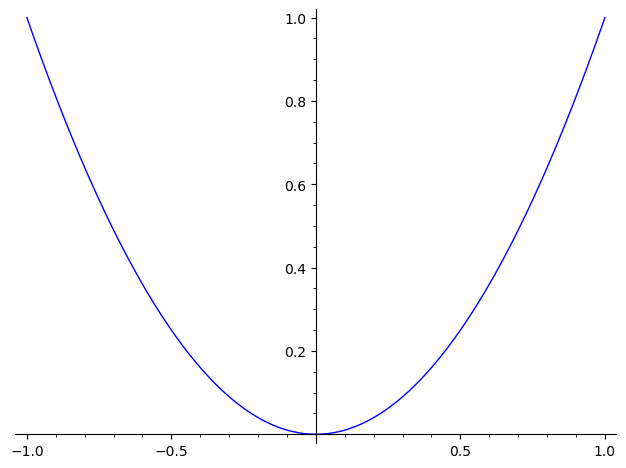

In [45]:
f(x) = x^2
plot(f)

Here are descriptions of some options taken from the manual:

- ``plot_points`` -- (default: 200) the minimal number of plot points
- ``color`` -- (default: ``'blue'``) one of:
    - an RGB tuple (r,g,b) with each of r,g,b between 0 and 1.
    - a color name as a string (e.g., ``'purple'``).
    - an HTML color such as '#aaff0b'.
- ``fillcolor`` -- the color of the fill for the plot of `X` (or each item in `X`).
  Default color is 'gray' if `X` is a single Sage object or if ``color`` is a single color. Otherwise, options are as in ``color`` above
- ``alpha`` -- how transparent the line is
- ``thickness`` -- how thick the line is
- ``rgbcolor`` -- the color as an RGB tuple
- ``hue`` -- the color given as a hue
- ``linestyle`` -- (default: ``'-'``) the style of the line, which is one of
    - ``'-'`` or ``'solid'``
    - ``'--'`` or ``'dashed'``
    - ``'-.'`` or ``'dash dot'``
    - ``':'`` or ``'dotted'``
    - ``"None"`` or ``" "`` or ``""`` (nothing)
    - (More options available)
- ``fill`` -- boolean (default: ``False``); one of:
    - "axis" or ``True``: Fill the area between the function and the x-axis.
    - "min": Fill the area between the function and its minimal value.
    - "max": Fill the area between the function and its maximal value.
    - a number c: Fill the area between the function and the horizontal line y = c.
    - a function g: Fill the area between the function that is plotted and g.
- ``fillalpha`` -- (default: 0.5) how transparent the fill is;
  a number between 0 and 1
- ``axes`` -- set to True or False to include axes (more options available)

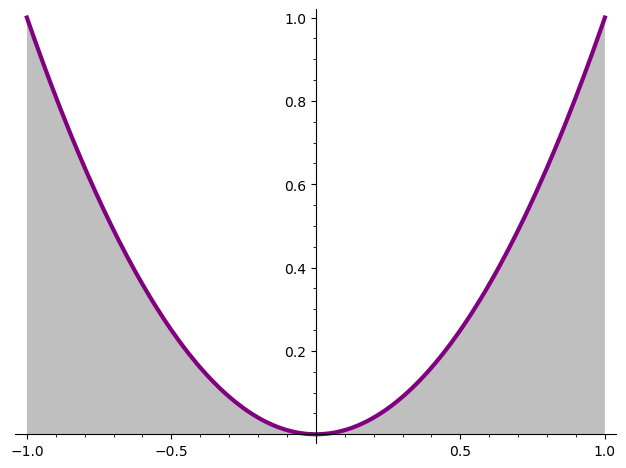

In [46]:
plot(f, color='purple', thickness=3, fill=True)

### Parametric Plot

An example from [the reference manual](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot.html#sage.plot.plot.parametric_plot) plots the function
$$x \ {\mapsto}\ \left(2 \, \cos\left(\frac{1}{4} \, x\right) + \cos\left(x\right),\,-2 \, \sin\left(\frac{1}{4} \, x\right) + \sin\left(x\right)\right)$$
for $x$ in the interval $[0, 8 \pi]$:


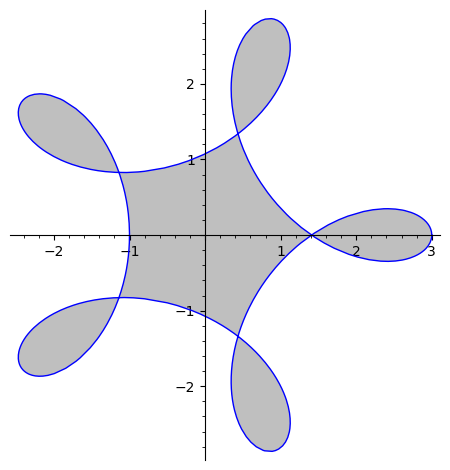

In [47]:
pp = parametric_plot([cos(x) + 2 * cos(x/4), sin(x) - 2 * sin(x/4)],
                     (x, 0, 8*pi), fill=True)
pp

I think the reference manual is much more helpful than the in-notebook help (because there are pictures in the manual). See below:

In [48]:
parametric_plot?

Signature:      parametric_plot(funcs, *args, **kwargs)
Docstring:     
   Plot a parametric curve or surface in 2d or 3d.

   "parametric_plot()" takes two or three functions as a list or a
   tuple and makes a plot with the first function giving the x
   coordinates, the second function giving the y coordinates, and the
   third function (if present) giving the z coordinates.

   In the 2d case, "parametric_plot()" is equivalent to the "plot()"
   command with the option "parametric=True".  In the 3d case,
   "parametric_plot()" is equivalent to "parametric_plot3d()". See
   each of these functions for more help and examples.

   INPUT:

   * "funcs" -- 2 or 3-tuple of functions, or a vector of dimension 2
     or 3.

   * "other options" -- passed to "plot()" or "parametric_plot3d()"

   EXAMPLES: We draw some 2d parametric plots.  Note that the default
   aspect ratio is 1, so that circles look like circles.

      sage: t = var('t')
      sage: parametric_plot((cos(t), sin(t)), (t

# Zorder

The parameter `zorder` controls the order in which 2D shapes are drawn. A greater `zorder` means that a shape will be drawn last. Here is an example:

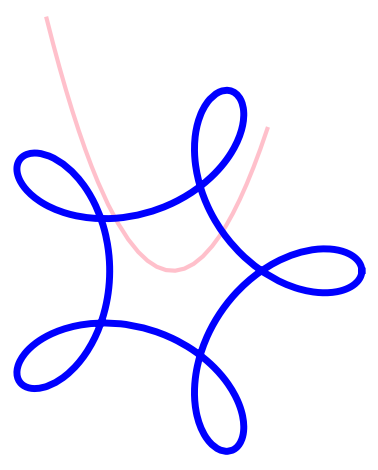

In [49]:
plt1 = plot(f, xmin=-2, xmax=3/2, axes=False, plot_points=5, color='pink', 
            thickness=3, zorder=1)
plt2 = parametric_plot([cos(x) + 2 * cos(x/4), sin(x) - 2 * sin(x/4)],
                     (x, 0, 8*pi), zorder=2, thickness=5)
plt2 + plt1

The parametric plot (in blue) has a greater `zorder` and so appears on top of the pink parabola.

Unfortunately, for compound plots (which feature more than one object per plot), the `zorder` parameter does not seem to work as you might expect. For example:

In [50]:
len(plt2)

1

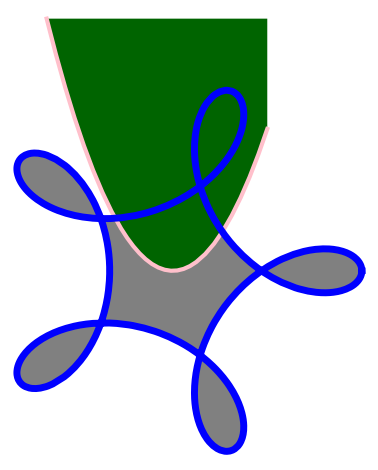

In [51]:
plt1 = plot(f, xmin=-2, xmax=3/2, axes=False, plot_points=5, color='pink', 
            thickness=3, fill='max', fillcolor='darkgreen', zorder=1, fillalpha=1)
plt2 = parametric_plot([cos(x) + 2 * cos(x/4), sin(x) - 2 * sin(x/4)],
                     (x, 0, 8*pi), fill=True, zorder=2, fillalpha=1, thickness=5)
plt2 + plt1

While the blue parametric curve does appear on top, its filling does not (even though it is part of `plt2`).

It seems that applying `zorder` to the `parametric_plot` only affects the curve. Plots are lists, and we can affect the zorder using the `set_zorder` method. (See [the `set_zorder` method in the documentation](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/primitive.html#sage.plot.primitive.GraphicPrimitive.set_zorder).)

A solution comes from realizing that each plot variable represents a list, consisting of individual objects that are plotted. They are given in a list-like syntax. Here we break-down the pieces:

In [52]:
len(plt1)

2

In [53]:
plt1[0]

Polygon defined by 31 points

In [54]:
plt1[1]

Line defined by 29 points

In [55]:
len(plt2)

2

In [56]:
plt2[0]

Polygon defined by 305 points

In [57]:
plt2[1]

Line defined by 305 points

In both cases above, item `[0]` is the filling (polygon) and item `[1]` is the curve. We can control the zorder of each component with the `set_zorder` method.

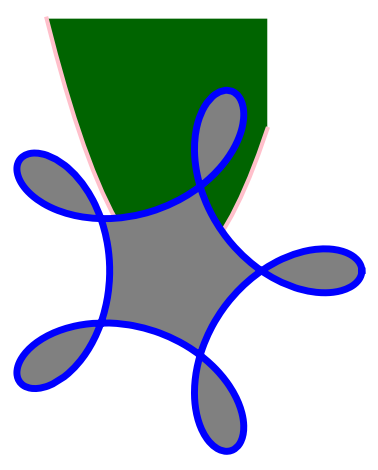

In [58]:
plt1[0].set_zorder(0)
plt2[1].set_zorder(1)
plt2[0].set_zorder(2)
plt2[1].set_zorder(3)
plt1 + plt2

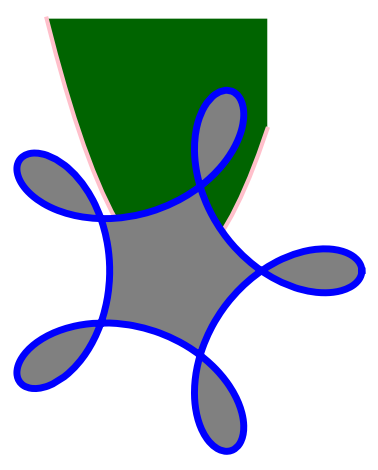

In [59]:
plt3 = plt1+plt2
plt3

### Saving plots, size of plot

We can save plots in various formats:

In [60]:
plt3.save('dumb_plot.png')

In [61]:
plt3.save('dumb_plot.pdf')

In [62]:
plt3.save('dumb_plot.svg')

Plots can be made larger with the `figsize` keyword argument:

In [63]:
plt3.save('dumb_plot2.png', figsize=16)

For more information on saving graphics, see the `.save` method documentation:

In [64]:
plt3.save?

Signature:      plt3.save(filename, **kwds)
Docstring:     
   Save the graphics to an image file.

   INPUT:

   * "filename" -- string. The filename and the image format given by
     the extension, which can be one of the following:

        * ".eps",

        * ".pdf",

        * ".pgf",

        * ".png",

        * ".ps",

        * ".sobj" (for a Sage object you can load later),

        * ".svg",

        * empty extension will be treated as ".sobj".

   All other keyword arguments will be passed to the plotter.

   OUTPUT:

   * none.

   EXAMPLES:

      sage: c = circle((1,1), 1, color='red')
      sage: from tempfile import NamedTemporaryFile
      sage: with NamedTemporaryFile(suffix=".png") as f:
      ....:     c.save(f.name, xmin=-1, xmax=3, ymin=-1, ymax=3)

   To make a figure bigger or smaller, use "figsize":

      sage: c.save(f.name, figsize=5, xmin=-1, xmax=3, ymin=-1, ymax=3)

   By default, the figure grows to include all of the graphics and
   text, so the fin

### Contour plots:

Given a rectangle $S \subset \mathbb R^2$ and a function $f:S \to \mathbb R$, 
the *contour plot* of $f$ is the plot that colors the point $(x, y) \in S$ according to the value $f(x, y)$. An example (taken from the [reference manual](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/contour_plot.html#sage.plot.contour_plot.contour_plot)) is:

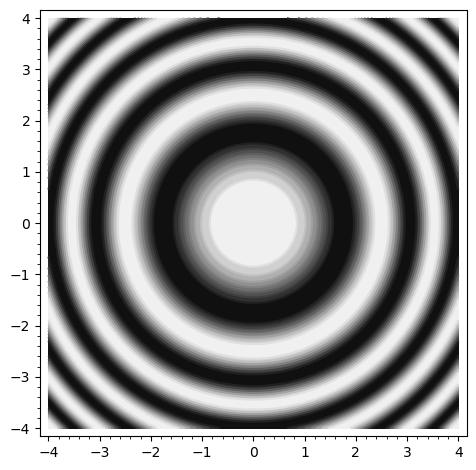

In [65]:
x,y = var('x,y')
contour_plot(cos(x^2 + y^2), (x,-4,4), (y,-4,4))

### Other plot types:

Sage also produces many other types of plots. You can learn how to create them by reading the documentation:

* [Slope fields and vector fields](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/plot_field.html)
* [Streamline plots (for differential equations)](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/streamline_plot.html)
* [Scatter plots](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/scatter_plot.html)
* [Step functions](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/step.html)
* [Histograms](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/histogram.html)
* [Bar charts](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/bar_chart.html)

## Basic geometric objects

We've already discussed how to plot:

* [chains of line segments](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/line.html)
* [collections of points](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/point.html)
* [polygons](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/polygon.html)


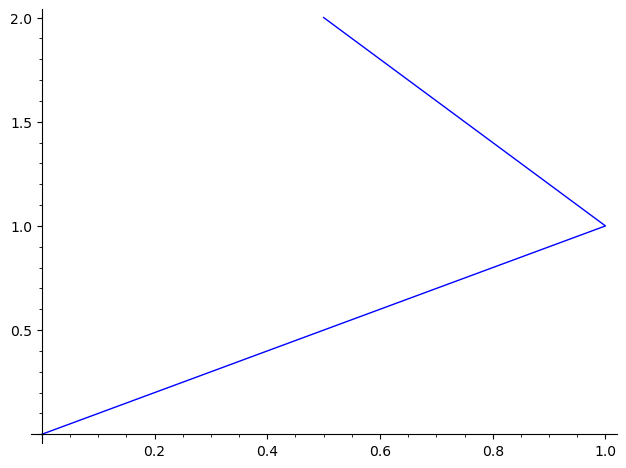

In [66]:
line([(0,0), (1,1), (1/2,2)])

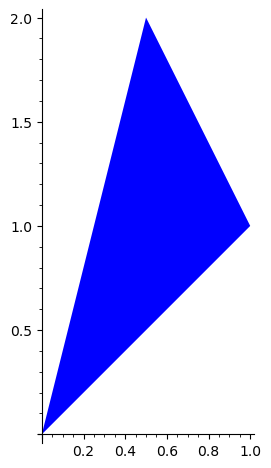

In [67]:
polygon([(0,0), (1,1), (1/2,2)])

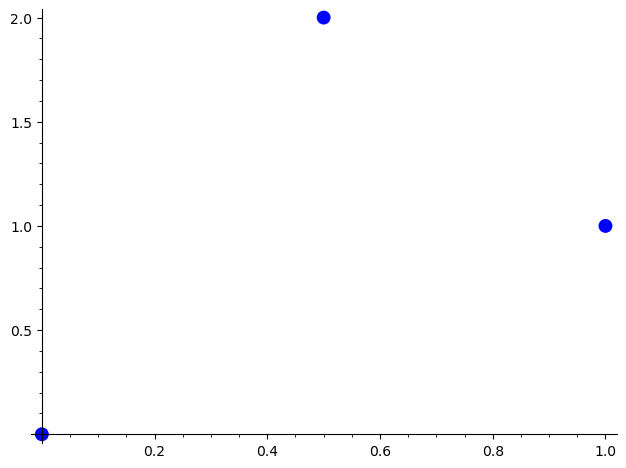

In [68]:
point([(0,0), (1,1), (1/2,2)], size=100)

### Arrows

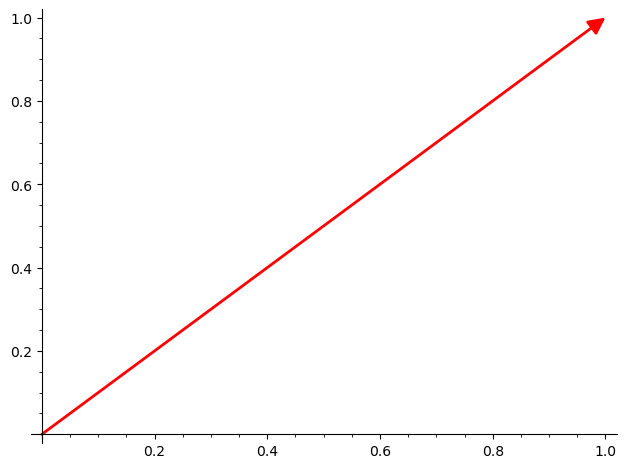

In [69]:
arrow((0,0), (1,1), color='red', thickness=3)

### Circles

The circle centered at $(1, 2)$ with radius $3$:

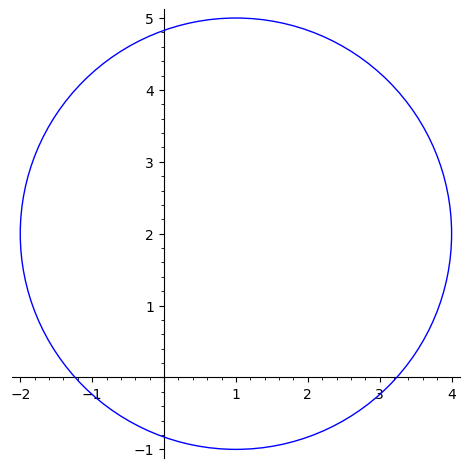

In [70]:
circle((1,2),3)

### Disks

Disks have an additonal parameter that defines the angular extent:

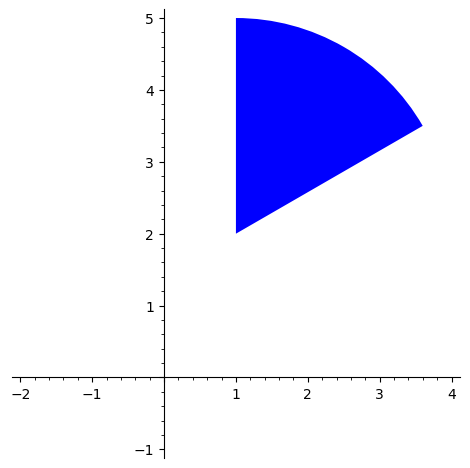

In [71]:
disk((1,2),3,(pi/6, pi/2))

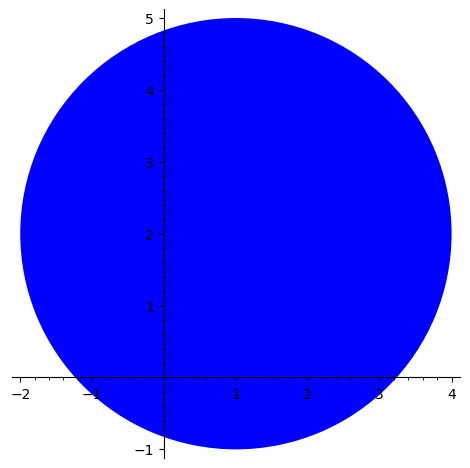

In [72]:
disk((1,2),3,(0, 2*pi))

For documentation see [the reference manual](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/disk.html#sage.plot.disk.disk).

### Ellipses

Ellipses are [documented in the reference manual](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/ellipse.html#sage.plot.ellipse.ellipse). Here is an example:

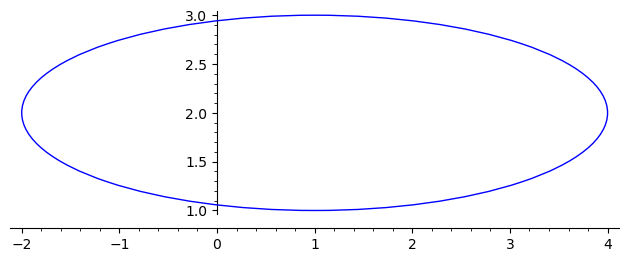

In [73]:
ellipse((1,2),3, 1)

### Text

Text can be centered at a point with the `text` function:

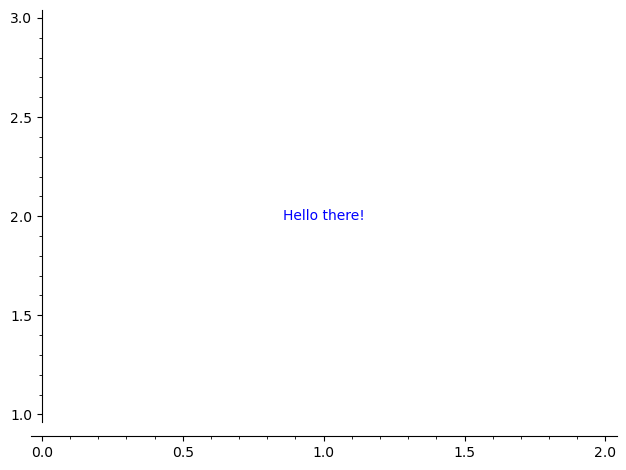

In [74]:
text("Hello there!", (1,2))

You can also write latex. If passing a latex command, you would want to use a raw string to avoid backslashes being escaped. A raw string can be created with the syntax `r'some string'. For more information, see the [Python documentation of string literals](https://docs.python.org/3/reference/lexical_analysis.html#string-and-bytes-literals) which includes a description of how strings are escaped normally in Python strings.

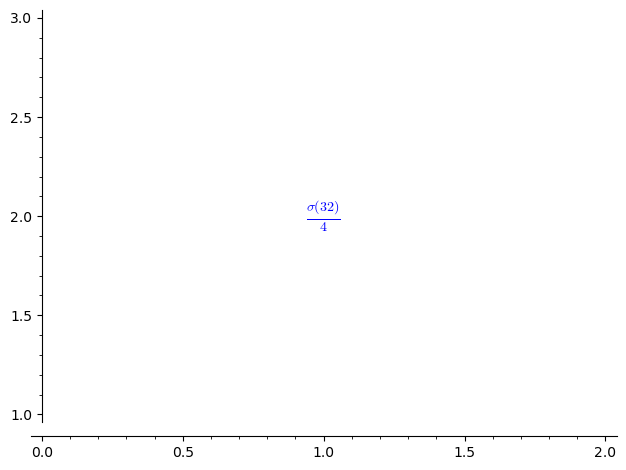

In [75]:
text(r'$\frac{\sigma(32)}{4}$', (1,2), fontsize='x-large')

There are a number of keyword parameters for `text`:

    - ``fontsize`` -- how big the text is. Either an integer that
      specifies the size in points or a string which specifies a size (one of
      ``'xx-small'``, ``'x-small'``, ``'small'``, ``'medium'``, ``'large'``,
      ``'x-large'``, ``'xx-large'``).

    - ``fontstyle`` -- string either ``'normal'``, ``'italic'`` or ``'oblique'``

    - ``fontweight`` -- a numeric value in the range 0-1000 or a string (one of
      ``'ultralight'``, ``'light'``, ``'normal'``, ``'regular'``, ``'book'``,
      ``'medium'``, ``'roman'``, ``'semibold'``, ``'demibold'``, ``'demi'``,
      ``'bold'``, ``'heavy'``, ``'extra bold'``, ``'black'``)

    - ``rgbcolor`` -- the color as an RGB tuple

    - ``hue`` -- the color given as a hue

    - ``alpha`` -- a float (0.0 transparent through 1.0 opaque)

    - ``background_color`` -- the background color

    - ``rotation`` -- how to rotate the text: angle in degrees, vertical, horizontal

    - ``vertical_alignment`` -- how to align vertically: top, center, bottom

    - ``horizontal_alignment`` -- how to align horizontally: left, center, right

    - ``zorder`` -- the layer level in which to draw

    - ``clip`` -- boolean (default: ``False``); whether to clip or not

    - ``axis_coords`` -- boolean (default: ``False``); if ``True``, use axis
      coordinates, so that (0,0) is the lower left and (1,1) upper right,
      regardless of the x and y range of plotted values

    - ``bounding_box`` -- dictionary specifying a bounding box; currently the
      text location



Here is an example from the [documentation of `text`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/text.html), which uses `text` to label some points in a picture.

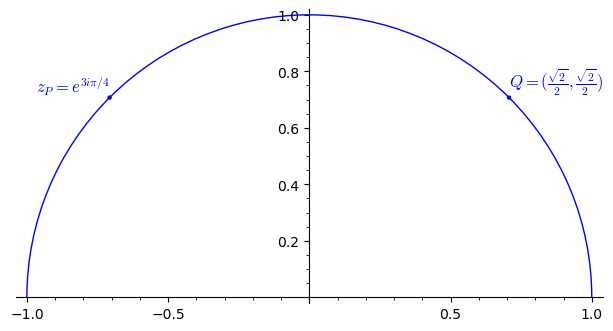

In [76]:
A = arc((0, 0), 1, sector=(0.0, RDF.pi()))
a = sqrt(1./2.)
PQ = point2d([(-a, a), (a, a)])
botleft = dict(horizontal_alignment='left', vertical_alignment='bottom')
botright = dict(horizontal_alignment='right', vertical_alignment='bottom')
tp = text(r'$z_P = e^{3i\pi/4}$',
          (-a, a), **botright, fontsize='large')
tq = text(r'$Q = (\frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2})$',
          (a, a), **botleft, fontsize='large')
A + PQ + tp + tq

### Bézier Curves

These work in 2D and 3D with the same formulas. As examples, I'll just think in 2D. A reasonable reference to the concept is the [Wikipedia article on Bézier curves](https://en.wikipedia.org/wiki/B%C3%A9zier_curve). There is also [documentation available for the SageMath function `bezier_path()`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/bezier_path.html).

## Quadratic curves

A quadratic Bézier curve determined by three points $A$, $B$, and $C$ is the unique curve of the form $c(t)=\big(p_1(t), p_2(t)\big)$ taken for $t \in [0,1]$ that satisfies the following statements:

* Both p1 and p2 are polynomials of degree two.
* $c(0)=A$ and $c(1)=D$.
* $c'(0)=2(B-A)$ and $c'(1)=2(C-B)$.


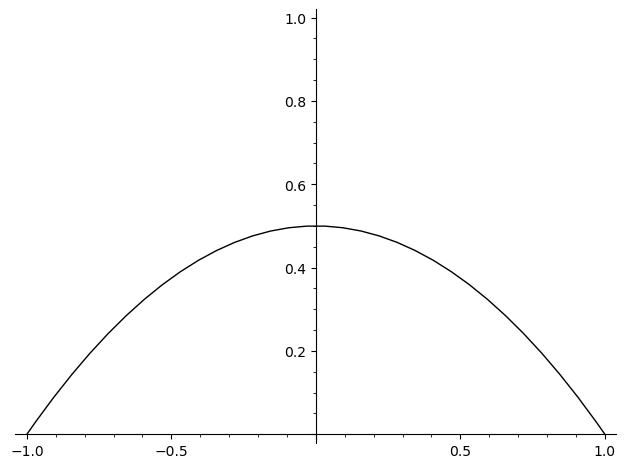

In [77]:
bezier_path([[(1,0), (0,1),(-1,0)]])

It is more common to use cubic curves because they fit better and give more control.

#### Cubic curves

The cubic Bézier curve determined by four points $A$, $B$, $C$ and $D$ is the unique curve of the form $c(t)=\big(p_1(t), p_2(t)\big)$ taken for $t \in [0,1]$ that satisfies the following statements:

* Both p1 and p2 are polynomials of degree three.
* $c(0)=A$ and $c(1)=C$.
* $c'(0)=3(B-A)$ and $c'(1)=3(C-B)$.

I will explain how to use this to approximate a parameterized curve $\gamma(t)=\big(x(t),y(t)\big)$. Let $t_j <t_{j+1}$. To approximate the arc between these points we use $A=\gamma(t_j)$ and $D=\gamma(t_{j+1})$. We would also define
$$B=\gamma(t_j)+\gamma'(t_j)\left(\frac{t_{j+1}-t_j}{3}\right)$$
and 
$$C=\gamma(t_{j+1})-\gamma'(t_{j+1})\left(\frac{t_{j+1}-t_j}{3}\right).$$

The following uses a cubic Bézier curves to approximate a quarter of a circle centered at $(300, 300)$ of radius $300$. (Note that there is a list of lists, with each inner list corresponding to one curve.)

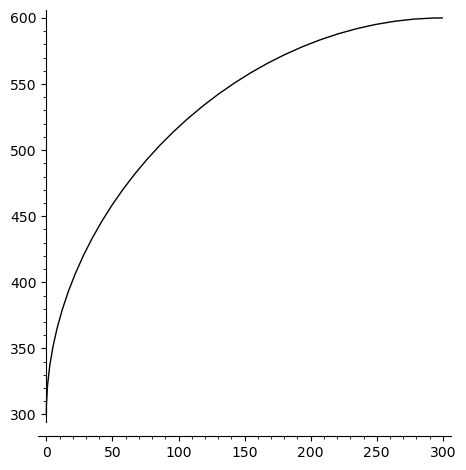

In [78]:
bz = bezier_path([[(0,300), (0,457.07963268), (142.920367,600), (300,600)]], aspect_ratio=1)
bz

Here we draw with a circle and observe it is very close.

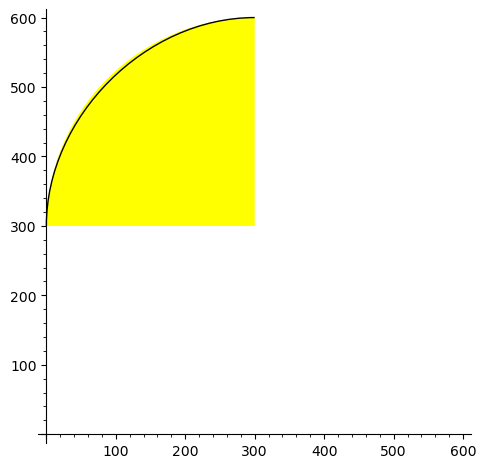

In [79]:
bezier_path([[(0,300), (0,457.07963268), (142.920367,600), (300,600)]], aspect_ratio=1) + disk((300,300), 300, (pi/2, pi), color='yellow')

The plot was zoomed out, so we explicitly perscribe a bounding box. (`Sage` seems to compute the bounding box of a disk using the whole boundary circle rather than the sector being plotted.)

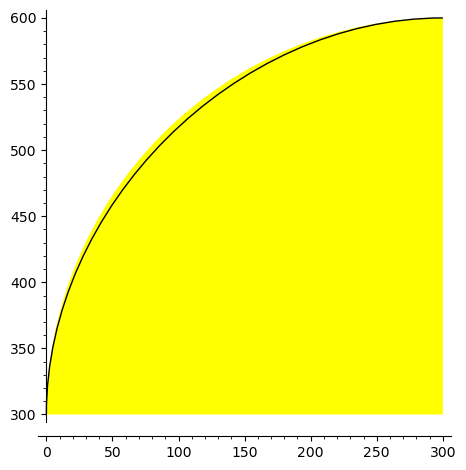

In [80]:
bezier_path([[(0,300), (0,457.07963268), (142.920367,600), (300,600)]], aspect_ratio=1, xmin=0, xmax=300, ymin=300, ymax=600) + disk((300,300), 300, (pi/2, pi), color='yellow')

### Task:

**Create a function that plots a point and a label for the point. Allow each to be customized.**

Here is a first draft:

In [81]:
def point_with_label(v, label):
    plt = point([v])
    plt += text(label, v)
    return plt

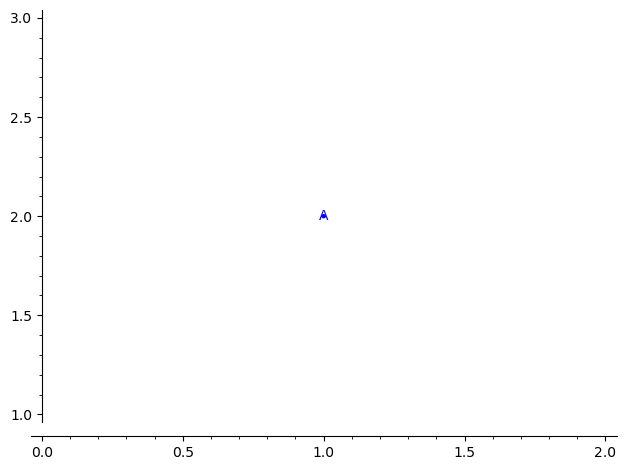

In [82]:
point_with_label((1,2), 'A')

Unfortunately, the label is directly on top of the point.

We now address the issue of customization. We use separate dictionaries to keep track of the plot options.

In [83]:
def point_with_label(v, label, point_opts = {}, label_opts = {}):
    plt = point([v], **point_opts)
    plt += text(label, v, **label_opts)
    return plt

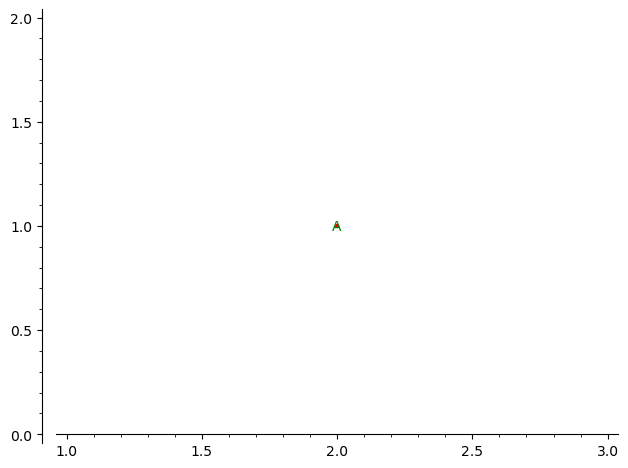

In [84]:
point_with_label((2,1), 'A', 
                 point_opts=dict(color='red'), 
                 label_opts=dict(color='green')) 

**Aside on merging dictionaries:**

The merge operator for dictionaries is `|`. The command `d1 | d2` creates a new dictionary that combines keys from `d1` and `d2`.

In [85]:
d1 = {'a': 1, 'b': 3}
d2 = {'a': 2, 'c': 5}
d1 | d2

{'a': 2, 'b': 3, 'c': 5}

Here note that the keys for resulting dictionary `d1 | d2` are the union of keys from the two dictionaries. In case a key appears in both dictionaries, the value coming from the dictionary on the right (`d2` here) is used. We can use this to establish default options, but still allow the person calling the method to override default values:

In [86]:
def point_with_label(v, label, point_opts = {}, label_opts = {}):
    point_defaults = {'color': 'black', 'size': '20'}
    point_kwds = point_defaults | point_opts
    plt = point([v], **point_kwds)
    label_defaults = {'horizontal_alignment': 'right', 'vertical_alignment': 'top'}
    label_kwds = label_defaults | label_opts
    plt += text(label, v, **label_kwds)
    return plt

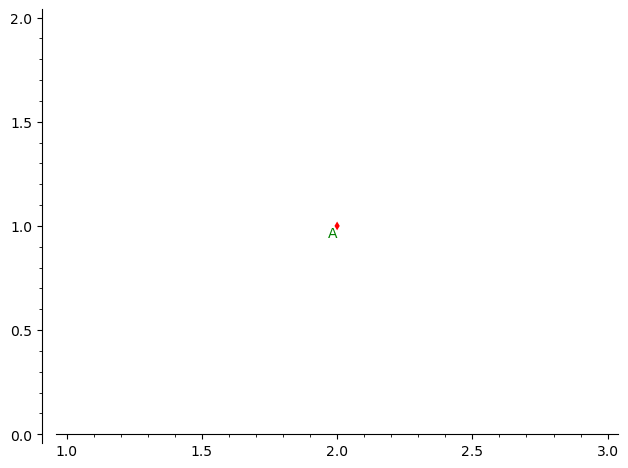

In [87]:
point_with_label((2,1), 'A', 
                 point_opts=dict(color='red', marker='d'), 
                 label_opts=dict(color='green')) 